<a href="https://colab.research.google.com/github/music-ai-644/AI_Study_2022/blob/main/Quiz/220718_(week8_quiz_mnist)_%EC%84%9C%EC%A7%84%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np 

In [26]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [27]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

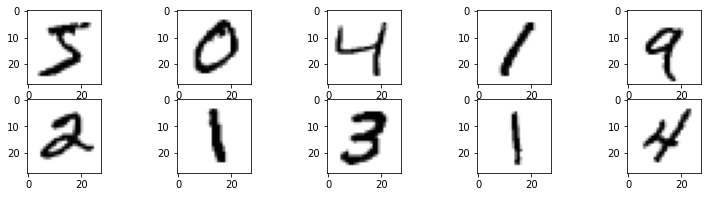

In [28]:
fig = plt.figure(figsize=(13, 3))

for i in range(10):
    plottable_image = np.reshape(x_train[i], (28, 28))
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(plottable_image, cmap='gray_r')

In [29]:
from sklearn.model_selection import train_test_split 
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [30]:
print("학습 데이터셋 클래스별 샘플 수 : ", np.bincount(y_train))
print("평가 데이터셋 클래스별 샘플 수 : ", np.bincount(y_valid))

학습 데이터셋 클래스별 샘플 수 :  [4738 5394 4766 4905 4674 4337 4734 5012 4681 4759]
평가 데이터셋 클래스별 샘플 수 :  [1185 1348 1192 1226 1168 1084 1184 1253 1170 1190]


In [31]:
x_train = x_train / 255
x_valid = x_valid / 255 
x_test = x_test / 255

In [32]:
x_train_reshape = x_train.reshape(-1, 784)
x_valid_reshape = x_valid.reshape(-1, 784)
x_test_reshape = x_test.reshape(-1, 784)

print("학습 데이터 셋의 형태 : ", x_train_reshape.shape)
print("검증 데이터 셋의 형태 : ", x_valid_reshape.shape)

학습 데이터 셋의 형태 :  (48000, 784)
검증 데이터 셋의 형태 :  (12000, 784)


In [33]:
tf.keras.utils.to_categorical([0,1,3])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [34]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_valid_encoded = tf.keras.utils.to_categorical(y_valid)

In [35]:
print(y_train[0], y_train_encoded[0], class_names[y_train[0]])

1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 1


In [36]:
import torch
x_train_torch = torch.FloatTensor(x_train_reshape)
y_train_torch = torch.FloatTensor(y_train_encoded)
x_valid_torch = torch.FloatTensor(x_valid_reshape)
y_valid_torch = torch.FloatTensor(y_valid_encoded) 
x_test_torch = torch.FloatTensor(x_test_reshape)
y_test_torch = torch.FloatTensor(y_test)

In [37]:
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [38]:
class MnistDataset(Dataset):
  def __init__(self, x, y):
    self.x_data = x
    self.y_data = y
  
  def __getitem__(self, index):
    x = self.x_data[index]
    y = self.y_data[index]
    return x, y
  
  def collate_fn(self, batch):
    x, y = zip(*batch)
    return x, y

  def __len__(self):
    return len(self.x_data)

In [39]:
dataset = MnistDataset(x_train_torch, y_train_torch)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, drop_last=True)

In [66]:
from tqdm import tqdm 
import random 

random_seed = 777
np.random.seed(random_seed)
torch.manual_seed(random_seed)
random.seed(random_seed)

model = nn.Sequential(
    nn.Linear(784, 500),
    nn.ReLU(),
    nn.Linear(500, 300),
    nn.ReLU(),
    nn.Linear(300, 10),
    )

optim = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

global_step = 0 
for epoch in range(14):
  t = tqdm(dataloader, ncols=100)
  for i, batch in enumerate(t):
    x_batch = batch[0]
    y_batch = batch[1]
    output = model(x_batch)
    loss = criterion(output, y_batch)
    model.zero_grad() 
    optim.zero_grad()
    loss.backward()
    optim.step()

    global_step += 1
    t.set_description("epoch: {} | global_step: {:8d} | loss: {:.4f}".format(epoch + 1, global_step, loss))

  predicts = model(x_valid_torch)
  predicts = torch.argmax(predicts, 1)

  correct = 0 
  for i in range(len(predicts)):
    if predicts[i].item() == y_valid[i]:
      correct += 1
  acc = correct / len(predicts)
  print("epoch: {} | global_step: {} | valid acc: {:%}".format(epoch + 1, global_step, acc))

epoch: 1 | global_step:     1500 | loss: 0.0639: 100%|██████████| 1500/1500 [00:24<00:00, 60.48it/s]


epoch: 1 | global_step: 1500 | valid acc: 95.991667%


epoch: 2 | global_step:     3000 | loss: 0.0144: 100%|██████████| 1500/1500 [00:29<00:00, 51.14it/s]


epoch: 2 | global_step: 3000 | valid acc: 97.008333%


epoch: 3 | global_step:     4500 | loss: 0.0532: 100%|██████████| 1500/1500 [00:28<00:00, 52.45it/s]


epoch: 3 | global_step: 4500 | valid acc: 97.308333%


epoch: 4 | global_step:     6000 | loss: 0.0826: 100%|██████████| 1500/1500 [00:29<00:00, 51.34it/s]


epoch: 4 | global_step: 6000 | valid acc: 97.666667%


epoch: 5 | global_step:     7500 | loss: 0.0236: 100%|██████████| 1500/1500 [00:29<00:00, 50.69it/s]


epoch: 5 | global_step: 7500 | valid acc: 97.700000%


epoch: 6 | global_step:     9000 | loss: 0.0036: 100%|██████████| 1500/1500 [00:30<00:00, 49.67it/s]


epoch: 6 | global_step: 9000 | valid acc: 97.716667%


epoch: 7 | global_step:    10500 | loss: 0.1169: 100%|██████████| 1500/1500 [00:29<00:00, 51.04it/s]


epoch: 7 | global_step: 10500 | valid acc: 97.541667%


epoch: 8 | global_step:    12000 | loss: 0.0040: 100%|██████████| 1500/1500 [00:30<00:00, 49.91it/s]


epoch: 8 | global_step: 12000 | valid acc: 97.358333%


epoch: 9 | global_step:    13500 | loss: 0.0009: 100%|██████████| 1500/1500 [00:30<00:00, 49.06it/s]


epoch: 9 | global_step: 13500 | valid acc: 97.783333%


epoch: 10 | global_step:    15000 | loss: 0.0002: 100%|█████████| 1500/1500 [00:30<00:00, 49.66it/s]


epoch: 10 | global_step: 15000 | valid acc: 97.825000%


epoch: 11 | global_step:    16500 | loss: 0.0260: 100%|█████████| 1500/1500 [00:30<00:00, 49.54it/s]


epoch: 11 | global_step: 16500 | valid acc: 97.591667%


epoch: 12 | global_step:    18000 | loss: 0.0001: 100%|█████████| 1500/1500 [00:31<00:00, 47.50it/s]


epoch: 12 | global_step: 18000 | valid acc: 97.733333%


epoch: 13 | global_step:    19500 | loss: 0.0001: 100%|█████████| 1500/1500 [00:29<00:00, 50.03it/s]


epoch: 13 | global_step: 19500 | valid acc: 98.016667%


epoch: 14 | global_step:    21000 | loss: 0.0000: 100%|█████████| 1500/1500 [00:29<00:00, 50.34it/s]


epoch: 14 | global_step: 21000 | valid acc: 97.966667%


In [67]:
predict = model(x_test_torch)
predict = torch.argmax(predict, 1)

In [68]:
correct = 0 
for i in range(len(predict)):
  if predict[i].item() == y_test[i]:
    correct += 1
acc = correct/len(predict)
print("Test accuracy : {:.2%}".format(acc))

Test accuracy : 98.23%


In [ ]:
fig = plt.figure(figsize=(15, 7))

for i in range(5):
    plottable_image = x_test[i+10]
    ax = fig.add_subplot(2, 5, i+1)
    ax.title.set_text(class_names[y_test[i+10]])
    ax.imshow(plottable_image, cmap='gray_r')
  
for i in range(5):
    plottable_image = x_test[i+10]
    ax = fig.add_subplot(2, 5, i+6)
    ax.title.set_text(class_names[predict[i+10].item()])
    ax.imshow(plottable_image, cmap='gray_r')

plt.show()